# PS.8 (conditioning, stability)

Verify that $\|\cdot\|_2:\mathbb{R}^n\rightarrow \mathbb{R}$ is partially well-conditioned. Prove that it is also well-conditioned.


# PS.8 (matrix norms)

Consider the $3$ matrix norms $\|\cdot\|_1$, $\|\cdot\|_2$, and $\|\cdot\|_\infty$ that induce the condition numbers $\kappa_1$, $\kappa_2$, and $\kappa_\infty$. For $A,B\in\mathbb{R}^{n\times n}$ invertible, verify the following claims for $p=1,2,\infty$:

a) $\kappa_p(A)\geq 1$,

b) $\kappa_p(AB)\leq \kappa_p(A)\kappa_p(B)$.

# PS.8 (qr-decomposition)

Suppose that the qr-decomposition of $A\in\mathbb{R}^{5\times 3}$ is given by $A=QR$ with 

\begin{equation*}
Q = \begin{pmatrix} 
*&1&*&*&*\\
1& 0 &0& 0&0\\
0&0&0&0&1\\
0&0&0&1&0\\
0&0&1&*&0\\
\end{pmatrix},\qquad 
R = \begin{pmatrix} 
3&1&1\\
0&2&1\\
0 &0&1\\
0&0&0\\
0& 0 & 0 
\end{pmatrix},
\end{equation*}
where "$*$" means you still need to reconstruct those entries.


Find the solution $\hat{x}\in\mathbb{R}^3$ of the linear least squares problem 
\begin{equation*}
\arg\min_{x\in\mathbb{R}^3}\|Ax-b\|^2_2,\qquad b=(1,6,3,4,5)^\top.
\end{equation*}





Since $Q$ needs to be orthogonal and we have $Q^T = Q^-1 \Rightarrow QQ^T = I$ "$*$" entries have to be 0

In [56]:
using LinearAlgebra
a = [0, 0, 0, 0, 0]
Q = [
    a[1] 1 a[2] a[3] a[4];
    1 0 0 0 0; 
    0 0 0 0 1; 
    0 0 0 1 0; 
    0 0 1 a[5] 0
]
R = [
    3 1 1;
    0 2 1;
    0 0 1;
    0 0 0;
    0 0 0;
]
b = [1, 6, 3, 4, 5]
c0 = (Q*b)[1:rank(R)]


3-element Vector{Int64}:
 6
 1
 5

# PS.8 (modified Newton's method)

Implement the modified Newton's method and apply your program to 

$$
f(x) = (x^2-2)^2
$$

with initial value $x_0=1$. Apply also Newton's method (solutions to PS.6 are at the moodle website) and compare the errors of both methods in a logarithmic plot.

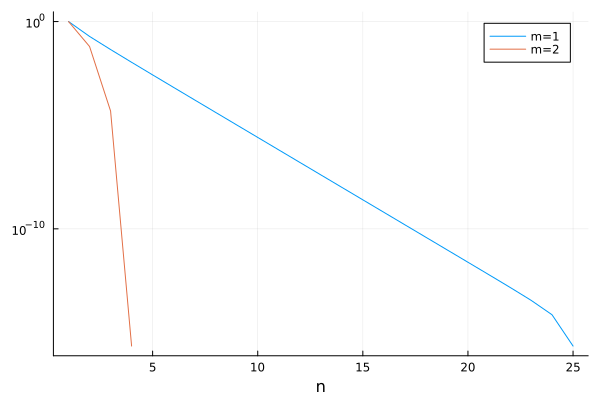

In [57]:
function myNewton(f, ∂f, x0; m=1, tol=1e-5, maxiter=50)
    x = Vector{Float64}(undef,maxiter)
    x[1] = x0
    for k in 1:maxiter-1
        x[k+1] = x[k] - m * f(x[k])/∂f(x[k])
        if abs(f(x[k+1])) < tol
            return x[1:k]
        end
    end
    return x
end

using Calculus:derivative
using Plots:plot,plot!
f(x) = (x^2-2)^2
∂f = derivative(f)

x = myNewton(f, ∂f, 1; m=1, tol=4*eps(), maxiter=100)  # m = 1
y = myNewton(f, ∂f, 1; m=2, tol=4*eps(), maxiter=100)  # m = 2

err_x = abs.(f.(x) .- f(x[end]))[1:end-1]
err_y = abs.(f.(y) .- f(y[end]))[1:end-1]
push!(err_x, eps())
push!(err_y, eps())
plot(err_x, yaxis=:log, label="m=1", xlabel="n")
plot!(err_y, label="m=2")